In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-and-stock-exchanges/Dataset.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "/kaggle/input/bitcoin-and-stock-exchanges/Dataset.csv"
data = pd.read_csv(url)

In [4]:
print(data.head())

       Date          BTC         NYSE       NASDAQ     LSE    BTC_Volume  \
0  1/2/2018  14982.09961  12902.71973  7006.899902  3742.0  1.684660e+10   
1  1/3/2018  15201.00000  12957.28027  7065.529785  3749.0  1.687190e+10   
2  1/4/2018  15599.20020  13028.45996  7077.910156  3749.0  2.178320e+10   
3  1/5/2018  17429.50000  13103.23047  7136.560059  3758.0  2.384090e+10   
4  1/8/2018  15170.09961  13114.34961  7157.390137  3744.0  1.841390e+10   

   NYSE_Volume  NASDAQ_Volume  LSE_Volume  
0   3397430000     1929700000      497857  
1   3544030000     2173130000     1009997  
2   3697340000     2103220000      669448  
3   3239280000     2024000000     2225274  
4   3246160000     2055010000      930995  


In [5]:
print(data.isnull().sum())

Date             0
BTC              0
NYSE             0
NASDAQ           0
LSE              0
BTC_Volume       0
NYSE_Volume      0
NASDAQ_Volume    0
LSE_Volume       0
dtype: int64


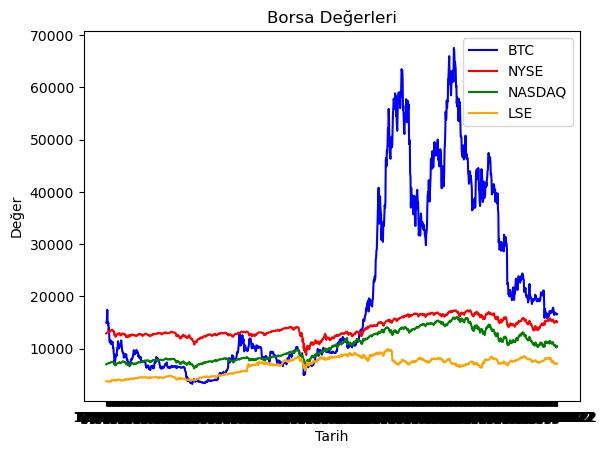

In [6]:
# çizgi grafiğini oluşturalım
plt.plot(data['Date'], data['BTC'], color='blue', label='BTC')
plt.plot(data['Date'], data['NYSE'], color='red', label='NYSE')
plt.plot(data['Date'], data['NASDAQ'], color='green', label='NASDAQ')
plt.plot(data['Date'], data['LSE'], color='orange', label='LSE')

# eksen etiketlerini ve başlığını ayarlayalım
plt.xlabel('Tarih')
plt.ylabel('Değer')
plt.title('Borsa Değerleri')

# grafiğe bir açıklama ekleyelim
plt.legend()

# grafiği gösterelim
plt.show()


In [7]:
x = data[["NYSE","NASDAQ","LSE"]]
y = data[["BTC"]]


In [8]:
x = x.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)


In [10]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred = lin.predict(x_test)


In [12]:
from sklearn.metrics import r2_score

In [13]:
print(r2_score(y_test,y_pred))

0.8727798444681376


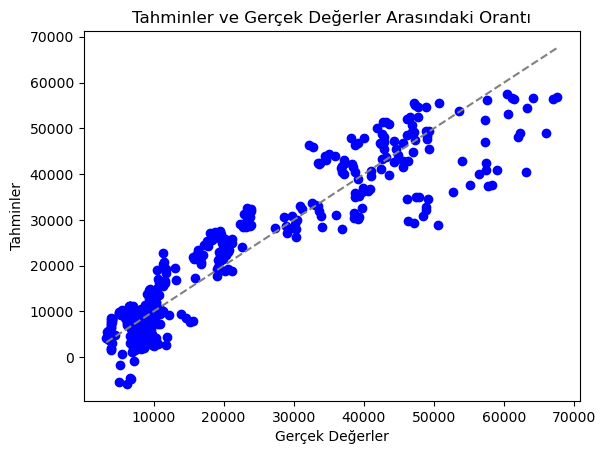

In [14]:
# çizgi grafiği oluşturma
plt.plot(y_test, y_pred,"o",  color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.title('Tahminler ve Gerçek Değerler Arasındaki Orantı')

plt.show()


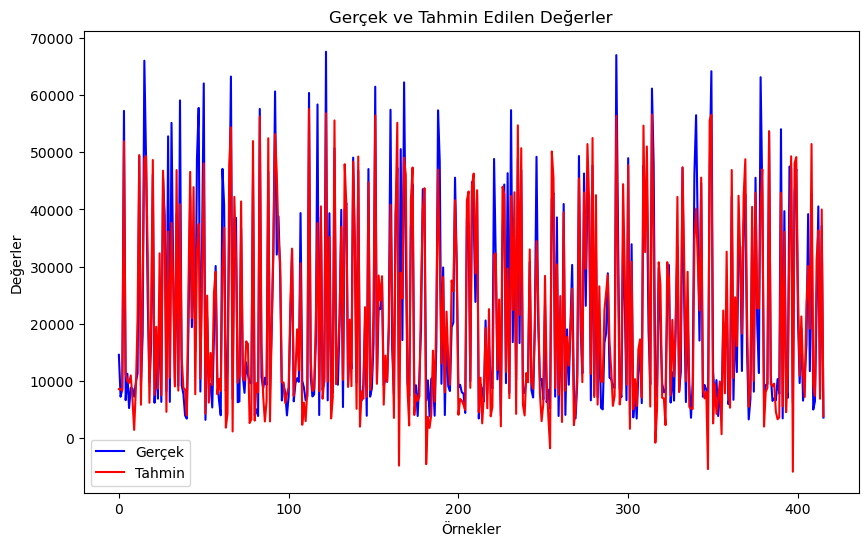

In [15]:
y_pred = pd.DataFrame(y_pred)
y_testdf = pd.DataFrame(y_test)
df = pd.concat([pd.DataFrame(y_testdf), pd.DataFrame(y_pred)], axis=1)
df.columns = ['Gerçek', 'Tahmin']

# grafik boyutunu ayarlayın
plt.figure(figsize=(10,6))

# gerçek ve tahmin değerlerini farklı renklerde çizdirin
plt.plot(df.index, df['Gerçek'], label='Gerçek', color='blue')
plt.plot(df.index, df['Tahmin'], label='Tahmin', color='red')

# eksik etiketleri tamamlayın
plt.xlabel('Örnekler')
plt.ylabel('Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.legend()

# grafiği gösterin
plt.show()

In [16]:
df["Fark"] = df["Gerçek"] - df["Tahmin"]

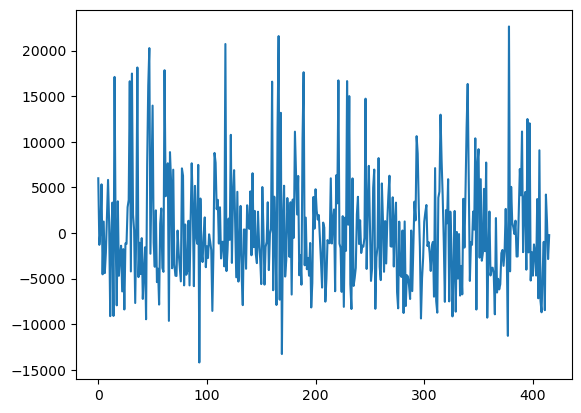

In [18]:
plt.plot(df["Fark"],label="Fark")
plt.show()